In [1]:
import snap
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd  # To read data
from math import log

import csv
import webbrowser

import networkx as nx

In [32]:
from load_datasets import load_banned
from load_datasets import load_graph
from load_datasets import get_banned_ids, banned_sub_in_G, get_random_subgraph_connected
import random

DATASET = 'title' 

# lists of strings, which are the names of banned subreddits to train and test on
TESTING, TRAINING = [], []

if __name__ == '__main__':
  # load graph and maps that are used to map ids (int) to subreddit names (str)
  G, id_to_subreddit, subreddit_to_id = load_graph(DATASET)
  # load banned subreddits [str]
  banned = load_banned()
  # get banned subreddits that appear in G
  banned = banned_sub_in_G(G, id_to_subreddit, banned)
  # get list of random sample of banned subreddits to train on. 
  TRAINING = random.sample(banned, int(len(banned) * 3 / 4))
  # rest of subreddits are for testing.
  TESTING = list(set(banned) - set(TRAINING))
  # generate subgraph of G
  a = get_banned_ids(TRAINING, subreddit_to_id)
  print(a)
  G_new = get_random_subgraph_connected(G, [40220], 1000)
  print('number of nodes in random subgraph: ', G_new.GetNodes())

[46231, 34611, 50113, 13862, 42892, 29374, 30388, 42638, 48464, 30635, 25122, 48463, 7979, 2450, 17384, 24646, 42748, 38469, 51977, 29425, 31157, 51445, 38595, 5654, 12494, 32407, 1750, 14423, 1795, 28280, 16482, 5526, 27447, 33731, 11435, 29652, 32017, 9764, 50002, 50375, 12193, 3371, 53330, 50099, 39740, 23361, 19798, 9347, 40019, 12315, 24457, 40515, 2251, 12425, 50012, 47900, 5518, 18272, 42010, 1103, 34508, 16302, 7128, 39249, 30658, 42600, 51099, 1447, 2219, 17489, 11176, 4663, 12381, 43850, 4998, 49143, 40220, 51614, 27791, 4846, 52672, 706, 14380, 42070, 39397, 28597, 31022, 8098, 39198, 636, 23551, 41384, 4092, 36737, 42897, 39934, 26578, 28743, 17139, 48635, 25911, 53780, 48848, 18869, 17559, 15937, 31924, 51903, 18289, 14696, 20211, 9261, 16281, 31876, 52191, 29860, 49717, 3466, 28502, 25866, 16257, 26994, 48421, 37508, 19964]
number of nodes in random subgraph:  1000


In [33]:
# #HOW TO ACTUALLY VISUALIZE THE NETWORK???
# actual = snap.TIntStrH()
# for NI in G_new.Nodes():
#     actual[NI.GetId()]= str(NI.GetId())
# snap.DrawGViz(G_new, snap.gvlDot, "output.png", "", actual)

In [44]:
def getNeighbors(i):
    NIdVIn = snap.TIntV()
    NIdVIn.Add(i.GetId())
    for j in i.GetOutEdges():
        NIdVIn.Add(j) 
    return NIdVIn

def cosSim(dictionary, idx):
    a = dictionary[idx]
    print("Feature Vector",a)
    simDict = {}
    for i in dictionary.keys():
        if i != 9:
            b = dictionary[i] 
            dot = np.dot(a, b)
            norma = np.linalg.norm(a)
            normb = np.linalg.norm(b)
            if norma != 0 and normb != 0:
                cos = dot / (norma * normb)
            else:
                cos = 0
            simDict.update({i: cos})
            
    return list(sorted(simDict.items(), key=lambda item: item[1], reverse = True))
    
dictionary ={}
for i in G_new.Nodes():
    nodeDeg = i.GetDeg() 
    G2 = snap.GetSubGraph(G_new, getNeighbors(i))
    numEdgesInEgoNet = G2.GetEdges()
    numberEdgesSurround = 0
    for j in G_new.Nodes():
        for k in G2.Nodes():
            if j!=k and G_new.IsEdge(j.GetId(),k.GetId()) and not G2.IsEdge(j.GetId(),k.GetId()):
                numberEdgesSurround += 1 
    dictionary.update({i.GetId():[nodeDeg,numEdgesInEgoNet, numberEdgesSurround]}) 
# print(dictionary)
#ID of boners = 41491 - banned subreddit
exampleid = -1
for i in a:
    if i in dictionary:
        exampleid = i
        print("banned subreddit id: ", i)
        print(cosSim(dictionary, i)[0:11])

banned subreddit id:  1103
Feature Vector [39, 4, 702]
[(1103, 1.0000000000000002), (494, 0.9999970538441852), (746, 0.999984861593048), (264, 0.9999834160371741), (1848, 0.9999811865620606), (295, 0.9999721373315602), (283, 0.9999582245210397), (1665, 0.9999494465071667), (200, 0.9999471056049712), (735, 0.999926641179654), (1250, 0.9999122734332091)]
banned subreddit id:  1447
Feature Vector [46, 437, 5827]
[(1447, 1.0), (1788, 0.999998769016159), (1370, 0.9999983858698879), (438, 0.999998070086774), (758, 0.9999968667148331), (718, 0.999996493938311), (837, 0.9999939902254608), (1527, 0.9999924739156896), (403, 0.99999227732705), (71, 0.9999896285307514), (128, 0.9999893147675271)]
banned subreddit id:  40220
Feature Vector [3, 3, 642]
[(40220, 1.0000000000000002), (38648, 0.9999995255441468), (433, 0.9999995057275693), (52623, 0.9999992914319293), (409, 0.9999988896950565), (497, 0.9999982373294889), (1708, 0.999998070311967), (1227, 0.9999980524679625), (627, 0.9999977672462803), 

In [45]:
#Question 2.2
orig = dictionary.copy()

def recurse(G, orig, K):
    K+=1
    newDict = {}
    for i in G.Nodes():
        nodeVec = orig[i.GetId()].copy()
        sumOfNbrs = [0]*len(nodeVec)
        count = 0
        for j in i.GetOutEdges():
            sumOfNbrs = np.add(sumOfNbrs, orig[j])
            count += 1
        if count != 0:
            mean = [x / float(count) for x in sumOfNbrs]
        else:
            mean = [0]*len(nodeVec)
        nodeVec.extend(mean)
        nodeVec.extend(sumOfNbrs)
        newDict.update({i.GetId(): nodeVec})
    if K == 2:
        return newDict
    else:
        return recurse(G,newDict,K)
expanded = recurse(G_new, orig, 0)
cosSimDict = {}
for i in a:
    if i in dictionary:
        print("banned subreddit id: ", i)
        x = cosSim(expanded, i)
        cosSimDict.update({i: x})
        print(cosSim(expanded, i)[0:11])

banned subreddit id:  1103
Feature Vector [39, 4, 702, 374.0, 610.0, 5029.5, 748, 1220, 10059, 374.0, 610.0, 5029.5, 202.88, 2001.9683333333332, 5719.611666666667, 7477.0, 47100.0, 191218.5, 748.0, 1220.0, 10059.0, 405.76, 4003.9366666666665, 11439.223333333333, 14954.0, 94200.0, 382437.0]
Feature Vector [39, 4, 702, 374.0, 610.0, 5029.5, 748, 1220, 10059, 374.0, 610.0, 5029.5, 202.88, 2001.9683333333332, 5719.611666666667, 7477.0, 47100.0, 191218.5, 748.0, 1220.0, 10059.0, 405.76, 4003.9366666666665, 11439.223333333333, 14954.0, 94200.0, 382437.0]
[(1103, 0.9999999999999999), (2452, 0.9998973936238591), (6868, 0.999804041792645), (652, 0.999748330578759), (735, 0.999623039573566), (1358, 0.9995526124560603), (295, 0.9995470203811777), (1460, 0.9995308882043767), (1724, 0.999446271914704), (891, 0.999434061904681), (52623, 0.9991181959161205)]
banned subreddit id:  1447
Feature Vector [46, 437, 5827, 199.8409090909091, 1236.7045454545455, 4679.136363636364, 8793, 54415, 205882, 199.840

In [37]:
#can just change the index of the below code to find cosSim of new node
#print(cosSim(expanded, 41491)[0:5])

In [38]:
cosSim(expanded, 40220)

Feature Vector [3, 3, 642, 361.0, 560.0, 4003.5, 722, 1120, 8007, 361.0, 560.0, 4003.5, 82.78205128205128, 675.5705128205128, 2012.3397435897436, 6457.0, 52694.5, 156962.5, 722.0, 1120.0, 8007.0, 165.56410256410257, 1351.1410256410256, 4024.6794871794873, 12914.0, 105389.0, 313925.0]


[(40220, 1.0),
 (673, 0.9997389975728118),
 (1467, 0.9997125608448031),
 (1724, 0.9986806305859485),
 (652, 0.9980109252969892),
 (2452, 0.9971550521050944),
 (735, 0.9967314748530173),
 (1103, 0.9964563197962923),
 (295, 0.9959668387371923),
 (6868, 0.9957072787214674),
 (1358, 0.9939993847591253),
 (1460, 0.9936602965512988),
 (891, 0.9932582592428394),
 (52623, 0.9931714520527565),
 (1552, 0.9927900127214179),
 (286, 0.9898836113608858),
 (494, 0.9895297252105288),
 (26339, 0.989463748970759),
 (497, 0.9892486279016446),
 (1679, 0.9892257891120584),
 (1418, 0.989049880579609),
 (970, 0.9886845127235148),
 (3479, 0.9883043656378435),
 (381, 0.9883000425330035),
 (1606, 0.987697675690348),
 (1753, 0.9862826824035348),
 (1891, 0.9856814907648996),
 (1272, 0.9852075578950812),
 (13929, 0.9848701508960302),
 (1328, 0.9847568731296698),
 (1708, 0.9842226146721851),
 (19126, 0.984214663800301),
 (1095, 0.9838904669401554),
 (1613, 0.9838095877029771),
 (963, 0.9826533448487744),
 (731, 0.9

40220


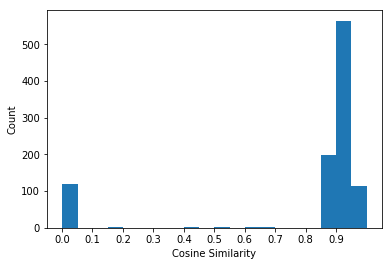

In [39]:
#Question 2.3a
#12381 - 
id = 40220
# id = exampleid
x = cosSimDict[id]
print(id)
y = { x[i][0] : x[i][1] for i in range(0, len(x))}
plt.hist(y.values(), bins=20)
plt.xticks(np.arange(0,1,0.1))
plt.ylabel('Count');
plt.xlabel('Cosine Similarity');

1103


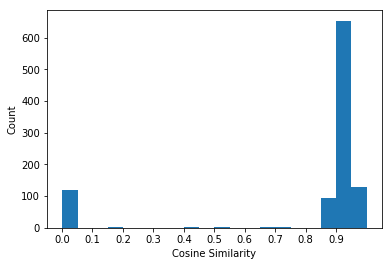

In [40]:
#Question 2.3a
#12381 - 
id = 1103
# id = exampleid
x = cosSimDict[id]
print(id)
y = { x[i][0] : x[i][1] for i in range(0, len(x))}
plt.hist(y.values(), bins=20)
plt.xticks(np.arange(0,1,0.1))
plt.ylabel('Count');
plt.xlabel('Cosine Similarity');

In [43]:
#Question 2.3b 
#For these groups / roles in the cosine similarity histogram, 
#take one node u from each group to examine the feature vector, 
#and draw the subgraph of the node based on its feature vector. 
#You can draw the subgraph by hand, or you can use libraries such as networkx or graphviz.

# #Question 2.3b
# #incel
# labels=pd.read_csv('title-data/snap-subreddit-ids-title.csv', names = ["name","id"])
# listR =  [40220]
# G_local = get_random_subgraph_connected(G, listR, 20)
# labels = snap.TIntStrH()
# for ni in G_local.Nodes():
#     labels[ni.GetId()] = id_to_subreddit[ni.GetId()]
# snap.DrawGViz(G_local, snap.gvlNeato, "graph_40220.png", " ", labels)
# # nx.draw_networkx(G_local)
# # plt.show()

# Question 2.3b
#darknetmarkets
labels=pd.read_csv('title-data/snap-subreddit-ids-title.csv', names = ["name","id"])
listR =  [1103]
G_local = get_random_subgraph_connected(G, listR, 20)
labels = snap.TIntStrH()
for ni in G_local.Nodes():
    labels[ni.GetId()] = id_to_subreddit[ni.GetId()]
snap.DrawGViz(G_local, snap.gvlNeato, "graph_1103.png", " ", labels)
# nx.draw_networkx(G_local)
# plt.show()

#darksouls
listR =  [673]
G_local1 = get_random_subgraph_connected(G, listR, 20)
labels = snap.TIntStrH()
for ni in G_local1.Nodes():
    labels[ni.GetId()] = id_to_subreddit[ni.GetId()]
snap.DrawGViz(G_local1, snap.gvlNeato, "graph_673.png", " ", labels)

#askreddit
listR =  [43]
G_local2 = get_random_subgraph_connected(G, listR, 20)
labels = snap.TIntStrH()
for ni in G_local2.Nodes():
    labels[ni.GetId()] = id_to_subreddit[ni.GetId()]
snap.DrawGViz(G_local2, snap.gvlNeato, "graph_43.png", " ", labels)




In [47]:
#pics
listR =  [41]
G_local2 = get_random_subgraph_connected(G, listR, 20)
labels = snap.TIntStrH()
for ni in G_local2.Nodes():
    labels[ni.GetId()] = id_to_subreddit[ni.GetId()]
snap.DrawGViz(G_local2, snap.gvlNeato, "graph_41.png", " ", labels)

In [31]:
#pics
listR =  [696]
G_local2 = get_random_subgraph_connected(G, listR, 20)
labels = snap.TIntStrH()
for ni in G_local2.Nodes():
    labels[ni.GetId()] = id_to_subreddit[ni.GetId()]
snap.DrawGViz(G_local2, snap.gvlNeato, "graph_696.png", " ", labels)

In [49]:
# print("688: Cosine Similarity = 0")
# for a in G.GetNI(688).GetOutEdges():
#     print(a)
# print("Feature Vector:", dictionary[688])
# g = nx.Graph()
# g.add_node(688)
# plt.figure()
# nx.draw_networkx(g)
# plt.show()

# for b in G.GetNI(1523).GetOutEdges():
#     print(b)
# print("1523: Cosine Similarity = 0.60422")
# print("Feature Vector:", dictionary[1523])
# k = nx.Graph()
# k.add_node(1523)
# k.add_node(1522)
# k.add_edge(1522,1523)
# plt.figure()
# nx.draw_networkx(k)
# plt.show()

# print("2: Cosine Similarity = 0.90975")
# print("Feature Vector:", dictionary[2])
# k = nx.Graph()
# for c in G.GetNI(2).GetOutEdges():
#     k.add_node(c)
#     k.add_edge(2,c)
# k.add_edge(3,4)
# k.add_edge(3,5)
# k.add_edge(3,6)
# k.add_edge(4,6)
# k.add_edge(4,5)
# k.add_edge(5,6)
# plt.figure()
# nx.draw_networkx(k)
# plt.show()

In [55]:
# labels1 = ['gaming', 'worldnews', 'gifs', 'funny', 'askReddit', 'aww', 'politics', 'todayilearned','pics','news']
nodeIds = [206, 121, 316, 19, 43, 106, 142, 72, 15, 300]
NIdV = snap.TIntV()
for i in nodeIds:
    NIdV.Add(i)
# 206, 121, 316, 19, 43, 106, 142, 72, 15, 300
topTen = snap.GetSubGraph(G, NIdV)
labels = snap.TIntStrH()
for ni in topTen.Nodes():
    labels[ni.GetId()] = id_to_subreddit[ni.GetId()]
snap.DrawGViz(topTen, snap.gvlNeato, "graph_topTen.png", " ", labels)